## 04 Linear Regression - Capital Bike Share

###  1. Exploratory Data Analysis

#### About the data

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE). The RMSLE is calculated as

$$ \sqrt{\frac{1}{n}\sum_{i=1}^{n}(log(p_i+1)−log(a_i+1))^2} $$

#### Submission Format

Your submission file must have a header and should be structured in the following format:

```
datetime,count
2011-01-20 00:00:00,0
2011-01-20 01:00:00,0
2011-01-20 02:00:00,0
```

#### Data Fields

| Column     | Meaning |
|:-----------|:----------|
| datetime   | hourly date + timestamp |
| season     | 1 = spring, 2 = summer, 3 = fall, 4 = winter |
| holiday    | whether the day is considered a holiday |
| workingday | whether the day is neither a weekend nor holiday |
| weather    | 1: Clear, Few clouds, Partly cloudy |
|            | 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist |
|            | 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds |
|            | 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| temp       | temperature in Celsius |
| atemp      | "feels like" temperature in Celsius |
| humidity   | relative humidity |
| windspeed  | wind speed |
| casual     | number of non-registered user rentals initiated |
| registered | number of registered user rentals initiated |
| count      | number of total rentals |

#### Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#### Read In The Dataset

In [2]:
df = pd.read_csv('_RES/train.csv')

#### Size of the Dataset

In [3]:
df.shape

(10886, 12)

#### Print a few Rows of the Dataset

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### Infos about dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### Descriptive Statistics

In [6]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


#### Add new columns for dates

In [7]:
ts = pd.to_datetime(df['datetime'])

In [8]:
ts

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [9]:
df['year'] = ts.dt.year

In [10]:
df['month'] = ts.dt.month

In [11]:
df['day'] = ts.dt.day

In [12]:
df['weekday'] = ts.dt.weekday

In [13]:
df['hour'] = ts.dt.hour

In [14]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,2,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,2,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,2,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,2,22


#### Check for missing values

In [15]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
weekday       0
hour          0
dtype: int64

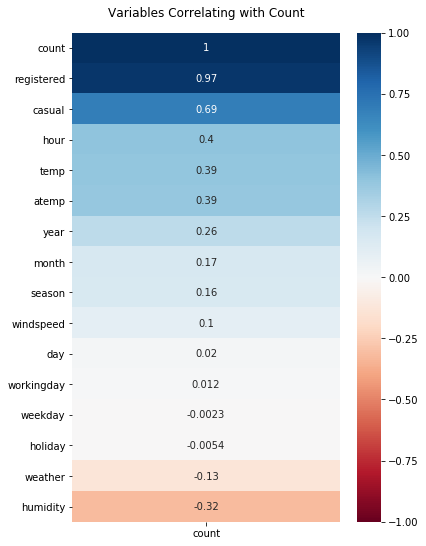

In [16]:
plt.figure(figsize=(6, 9))
heatmap = sns.heatmap(df.corr()[['count']].sort_values(by='count', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdBu')

heatmap.set_title('Variables Correlating with Count', fontdict={'fontsize':12}, pad=16);

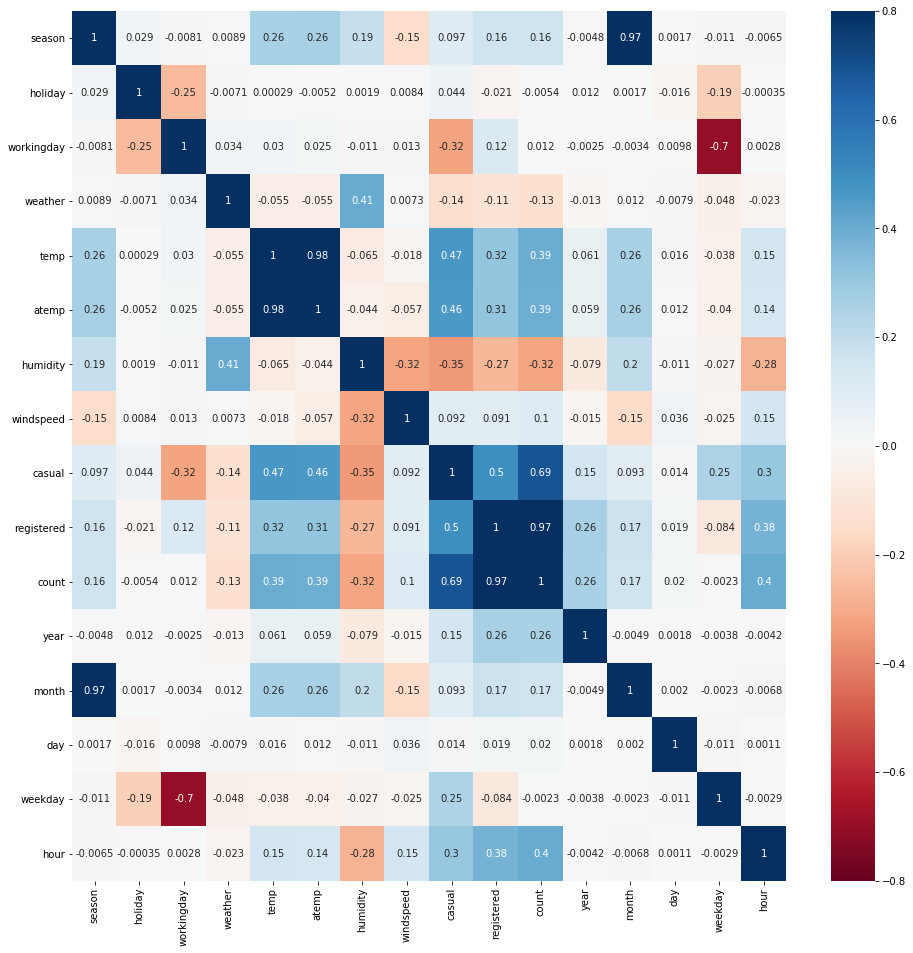

In [17]:
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(df.corr(), vmin=-.8, vmax=.8, annot=True, cmap='RdBu')

#### 'Season' Insights

In [18]:
df.groupby(['season'])['count'].mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

Text(0.5, 1.0, 'Box Plot on Count across Season')

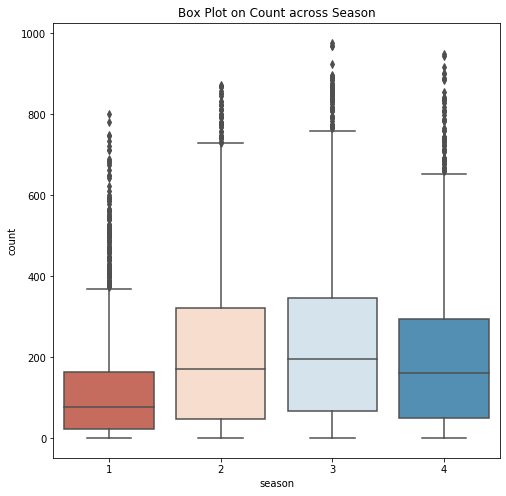

In [19]:
plt.figure(figsize = (8,8))
sns.boxplot(data = df, x = "season", y = "count", palette='RdBu').set_title('Box Plot on Count across Season')

#### 'Date' Insights

Text(0.5, 1.0, 'Count by Month')

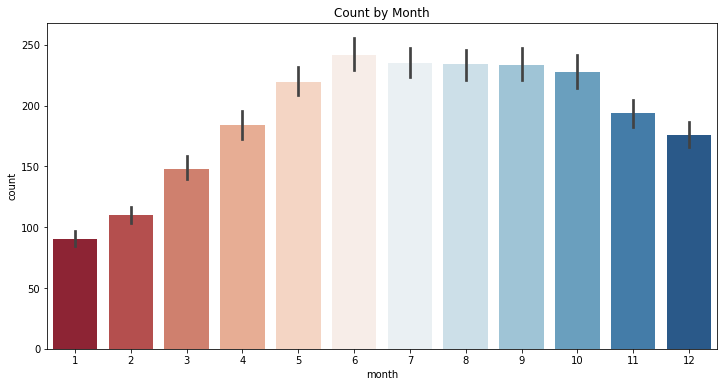

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="month", y="count", palette='RdBu').set_title("Count by Month")

In [21]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

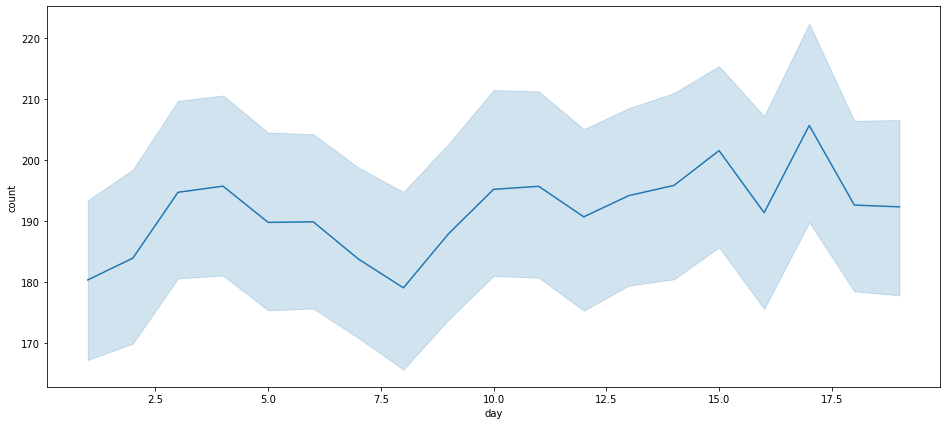

In [22]:
plt.figure(figsize=(16,7))

sns.lineplot(data=df, x='day', y='count', palette='RdBu')

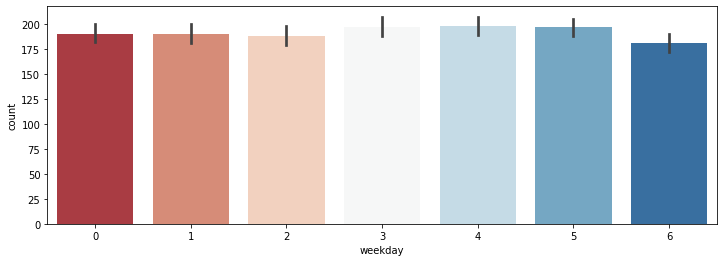

In [23]:
plt.figure(figsize=(12,4))

sns.barplot(data=df, x='weekday', y='count', palette='RdBu')

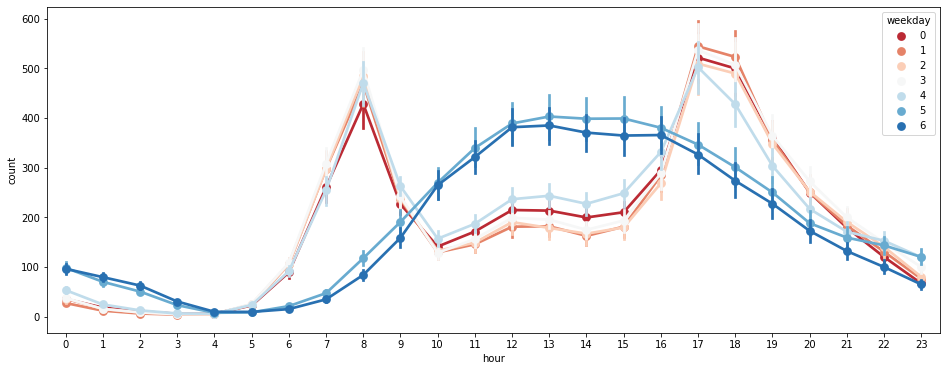

In [24]:
plt.figure(figsize=(16,6))

sns.pointplot(x = "hour", y = "count", data = df, hue = "weekday", palette = "RdBu", legend='full')

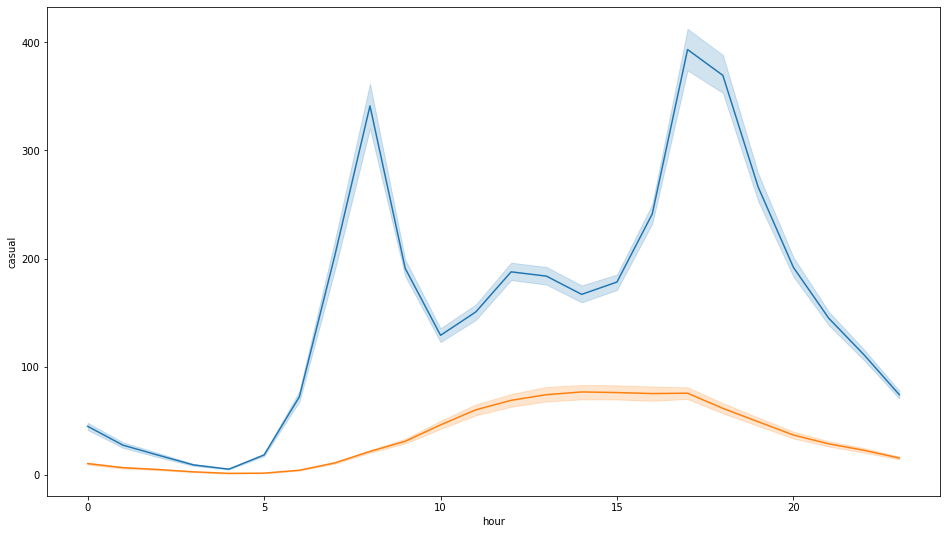

In [25]:
plt.figure(figsize=(16,9))

sns.lineplot(x = 'hour', y = 'registered', data = df, palette = "RdBu", legend='full')
sns.lineplot(x = 'hour', y = 'casual', data = df, palette = "RdBu", legend='full')

In [33]:
df.resample('M').sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [32]:
plt.figure(figsize=(16,9))

sns.lineplot(x = 'datetime', y = 'registered', data=df)

Error in callback <function flush_figures at 0x7f19e6cec830> (for post_execute):


KeyboardInterrupt: 

###  2. Train/Test Split

In [27]:
X = df.drop(['count'], axis=1)

In [28]:
y = df[['datetime', 'count']].set_index('datetime')

In [29]:
y

,count
datetime,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1
...,...
2012-12-19 19:00:00,336
2012-12-19 20:00:00,241
2012-12-19 21:00:00,168


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7293, 16), (3593, 16), (7293, 1), (3593, 1))

###  3. Feature Engineering

###  4. Train A Model

#### Train baseline model

#### Train Linear Regression Model

###  5. Cross-Validation

###  6. Optimize The Model Iteratively

Select features, try different regressors (e.g. Linear Regression, Random Forest Regressor, SVR)

###  7. Calculate Test Score

###  8. Submit To Kaggle